In [1]:


import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/leash-BELKA/sample_submission.csv
/kaggle/input/leash-BELKA/train.parquet
/kaggle/input/leash-BELKA/test.parquet
/kaggle/input/leash-BELKA/train.csv
/kaggle/input/leash-BELKA/test.csv


In [2]:
# Installing packages
!pip install duckdb
!pip install watermark
!pip install pysmiles
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 53.2 MB/s eta 0:00:00


In [3]:
# Import of libraries

# System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Database
import duckdb

# Data visualization
import pysmiles
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit import RDLogger
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

# Python version
from IPython.display import SVG
IPythonConsole.ipython_useSVG=True

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.13
Author: Library versions

seaborn   : 0.12.2
pandas    : 2.2.2
re        : 2.2.1
duckdb    : 0.10.3
pysmiles  : 1.1.2
watermark : 2.4.3
numpy     : 1.26.4
rdkit     : 2023.9.6
matplotlib: 3.7.5
plotly    : 5.18.0



## **1.Database**

In [4]:
# Database - Parquet format
data_train = '/kaggle/input/leash-BELKA/train.parquet'
test_path = '/kaggle/input/leash-BELKA/test.parquet'

# Bank connection
con = duckdb.connect()

# Query
data = con.query(f"""(SELECT * FROM parquet_scan('{data_train}') 
WHERE binds = 0
ORDER BY random()
LIMIT 30000)
UNION ALL
(SELECT * FROM parquet_scan('{data_train}')
WHERE binds = 1
ORDER BY random()
LIMIT 30000)""").df()

# Closing database
con.close()

# Saving dataset
data.to_csv("/kaggle/working/dataset.csv")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [5]:
# Viewing first 5 data
data.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
0,212322089,O=C(Nc1cccc(Cl)c1C(=O)O)OCC1c2ccccc2-c2ccccc21,Nc1ccc2c(c1)COC2=O,Cl.Cn1cc(CN)c(Br)n1,Cn1cc(CNc2nc(Nc3ccc4c(c3)COC4=O)nc(Nc3cccc(Cl)...,sEH,0
1,221333567,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CNC(=O)c1ccc(N)cc1F,COC(=O)c1nccnc1N,CNC(=O)c1ccc(Nc2nc(Nc3cnccc3C(=O)N[Dy])nc(Nc3n...,sEH,0
2,11478804,CC(=O)c1ccc(C[C@H](NC(=O)OCC2c3ccccc3-c3ccccc3...,Cl.NCCC1CC1,Cc1ccc(CN)n1C,CC(=O)c1ccc(C[C@H](Nc2nc(NCCC3CC3)nc(NCc3ccc(C...,BRD4,0
3,173933047,O=C(Nc1cc(F)c(F)cc1C(=O)O)OCC1c2ccccc2-c2ccccc21,N#Cc1cc(N)ccc1F,Nc1ccc(Cl)nc1,N#Cc1cc(Nc2nc(Nc3ccc(Cl)nc3)nc(Nc3cc(F)c(F)cc3...,HSA,0
4,69341040,N#Cc1ccc([C@H](CC(=O)O)NC(=O)OCC2c3ccccc3-c3cc...,N#Cc1cc(F)ccc1N,N#Cc1c(N)cccc1F,N#Cc1ccc([C@H](CC(=O)N[Dy])Nc2nc(Nc3ccc(F)cc3C...,BRD4,0


In [6]:
# Viewing 5 latest data
data.tail()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
59995,119960094,O=C(N[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)O)OCC1c2cc...,CCOc1cc(N)ccn1,NCc1ccc2[nH]ccc2c1,CCOc1cc(Nc2nc(NCc3ccc4[nH]ccc4c3)nc(N[C@H](Cc3...,BRD4,1
59996,82045076,O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,Cc1c([C@@H]2[C@@H](CN)CC(=O)N2C)cnn1C,COc1c(N)ncnc1Cl,COc1c(Cl)ncnc1Nc1nc(NCC2CCC(C(=O)N[Dy])CC2)nc(...,sEH,1
59997,293264158,O=C(O)[C@H]1Cc2ccccc2CN1C(=O)OCC1c2ccccc2-c2cc...,COC(=O)c1cncc(N)c1,Nc1nc2cc(Br)ccn2n1,COC(=O)c1cncc(Nc2nc(Nc3nc4cc(Br)ccn4n3)nc(N3Cc...,HSA,1
59998,125085714,O=C(N[C@H](Cc1ccc(I)cc1)C(=O)O)OCC1c2ccccc2-c2...,Nc1ccc(CC2COC(=O)N2)cc1,Cl.Cn1cc(N)ccc1=O,Cn1cc(Nc2nc(Nc3ccc(CC4COC(=O)N4)cc3)nc(N[C@H](...,BRD4,1
59999,30069979,COc1cc(C(=O)O)c(N)cc1NC(=O)OCC1c2ccccc2-c2ccccc21,Cl.NCc1cnc2n1CCOC2,Cn1ccc2cc(N)ccc21,COc1cc(C(=O)N[Dy])c(N)cc1Nc1nc(NCc2cnc3n2CCOC3...,HSA,1


In [7]:
# Rows and columns
data.shape

(60000, 7)

In [8]:
# Info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     60000 non-null  int64 
 1   buildingblock1_smiles  60000 non-null  object
 2   buildingblock2_smiles  60000 non-null  object
 3   buildingblock3_smiles  60000 non-null  object
 4   molecule_smiles        60000 non-null  object
 5   protein_name           60000 non-null  object
 6   binds                  60000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.2+ MB


In [9]:
# Data type
data.dtypes

id                        int64
buildingblock1_smiles    object
buildingblock2_smiles    object
buildingblock3_smiles    object
molecule_smiles          object
protein_name             object
binds                     int64
dtype: object

In [10]:
# Converting column
data['molecule'] = data['molecule_smiles'].apply(Chem.MolFromSmiles)

# Creating a onehotencode function
def modl(molecule_data, radius=2, bits=1024):
    if molecule_data is None:
        return None
    return list(AllChem.GetMorganFingerprintAsBitVect(molecule_data, radius, nBits=bits))

# Viewing new column
data['H1_ecfp'] = data['molecule'].apply(modl)

# New column
data.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds,molecule,H1_ecfp
0,212322089,O=C(Nc1cccc(Cl)c1C(=O)O)OCC1c2ccccc2-c2ccccc21,Nc1ccc2c(c1)COC2=O,Cl.Cn1cc(CN)c(Br)n1,Cn1cc(CNc2nc(Nc3ccc4c(c3)COC4=O)nc(Nc3cccc(Cl)...,sEH,0,<rdkit.Chem.rdchem.Mol object at 0x7fb734f0cc80>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,221333567,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CNC(=O)c1ccc(N)cc1F,COC(=O)c1nccnc1N,CNC(=O)c1ccc(Nc2nc(Nc3cnccc3C(=O)N[Dy])nc(Nc3n...,sEH,0,<rdkit.Chem.rdchem.Mol object at 0x7fb734f0dd90>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,11478804,CC(=O)c1ccc(C[C@H](NC(=O)OCC2c3ccccc3-c3ccccc3...,Cl.NCCC1CC1,Cc1ccc(CN)n1C,CC(=O)c1ccc(C[C@H](Nc2nc(NCCC3CC3)nc(NCc3ccc(C...,BRD4,0,<rdkit.Chem.rdchem.Mol object at 0x7fb734f0dc40>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,173933047,O=C(Nc1cc(F)c(F)cc1C(=O)O)OCC1c2ccccc2-c2ccccc21,N#Cc1cc(N)ccc1F,Nc1ccc(Cl)nc1,N#Cc1cc(Nc2nc(Nc3ccc(Cl)nc3)nc(Nc3cc(F)c(F)cc3...,HSA,0,<rdkit.Chem.rdchem.Mol object at 0x7fb734f0da10>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,69341040,N#Cc1ccc([C@H](CC(=O)O)NC(=O)OCC2c3ccccc3-c3cc...,N#Cc1cc(F)ccc1N,N#Cc1c(N)cccc1F,N#Cc1ccc([C@H](CC(=O)N[Dy])Nc2nc(Nc3ccc(F)cc3C...,BRD4,0,<rdkit.Chem.rdchem.Mol object at 0x7fb734f0db60>,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [11]:
# Importing library
from sklearn.preprocessing import OneHotEncoder

# Creating an instance
encoder_onehot = OneHotEncoder(sparse_output=False)

# Training
encoder_onehot_fit = encoder_onehot.fit_transform(data['protein_name'].values.reshape(-1, 1))

# Viewing
encoder_onehot

OneHotEncoder(sparse_output=False)

In [12]:
# Viewing column
data.protein_name

0         sEH
1         sEH
2        BRD4
3         HSA
4        BRD4
         ... 
59995    BRD4
59996     sEH
59997     HSA
59998    BRD4
59999     HSA
Name: protein_name, Length: 60000, dtype: object

In [13]:
# Combine ECFPs and one-hot encoded protein_name
X = [ecfp + protein for ecfp, protein in zip(data['H1_ecfp'].tolist(), encoder_onehot_fit.tolist())]
y = data['binds'].tolist()

# 4. Model training and testing

In [14]:
# Importing library
from sklearn.model_selection import train_test_split

# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
%%time

# Importing libraries
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm

# Metrics and model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report

# Machine learning model
models = { 
    
    # model Logistic Regression
    "Logistic Regression": LogisticRegression(),
    
    # model Naive bayes
    "Naive bayes": GaussianNB(),
    
    # model KNN
    "KNN": KNeighborsClassifier(),
    
    # model AdaBoost
    "Ada Boost": AdaBoostClassifier(),
    
    # model Gradient Boosting
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    
    # model Decision Tree Classifier - With adjusted internal parameters
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5, 
                                                       min_samples_split=2, 
                                                       random_state=105),
    
    # model XGBoost - With adjusted internal parameters
    "XGBoost": XGBClassifier(n_estimators=100,
                             max_depth=250,
                             learning_rate=0.1,
                             subsample=0.8,
                             colsample_bytree=0.8,
                             objective='multi:softmax',
                             num_class=3,
                             random_state=42,
                             tree_method='gpu_hist'),
    
    # model LGBM - with adjusted internal parameters
    "LGBM": LGBMClassifier(boosting_type='gbdt',
                           bagging_freq=5,
                           verbose=0,
                           device='gpu',
                           num_leaves=31,
                           max_depth=250,
                           learning_rate=0.1,
                           n_estimators=100)}
# Training models
for name, model in tqdm(models.items(), desc="Training models", total=len(models)):
    
    # # Model training
    model.fit(X_train, y_train)
    
    # Cross-validation
    score_training = cross_val_score(model, X_train, y_train, cv=10)
    
    # Model forecast
    pred_model = model.predict(X_test)
    
    # Viewing models
    tqdm.write("Model: {} has Accuracy {:.2f}%".format(model.__class__.__name__, round(score_training.mean(), 2) * 100))
    print()

Training models:  12%|█▎        | 1/8 [01:40<11:44, 100.63s/it]

Model: LogisticRegression has Accuracy 87.00%



Training models:  25%|██▌       | 2/8 [03:00<08:50, 88.36s/it] 

Model: GaussianNB has Accuracy 74.00%



Training models:  38%|███▊      | 3/8 [05:12<09:02, 108.45s/it]

Model: KNeighborsClassifier has Accuracy 80.00%



Training models:  50%|█████     | 4/8 [13:33<17:33, 263.47s/it]

Model: AdaBoostClassifier has Accuracy 79.00%



Training models:  62%|██████▎   | 5/8 [43:18<40:36, 812.11s/it]

Model: GradientBoostingClassifier has Accuracy 84.00%



Training models:  75%|███████▌  | 6/8 [44:35<18:44, 562.10s/it]

Model: DecisionTreeClassifier has Accuracy 75.00%



Training models:  88%|████████▊ | 7/8 [52:01<08:44, 524.23s/it]

Model: XGBClassifier has Accuracy 91.00%

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_freq is set=5, subs

Training models: 100%|██████████| 8/8 [53:43<00:00, 402.98s/it]

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Model: LGBMClassifier has Accuracy 89.00%

CPU times: user 58min 38s, sys: 1min 6s, total: 59min 44s
Wall time: 53min 47s



Machine Learning Model: Logistic Regression





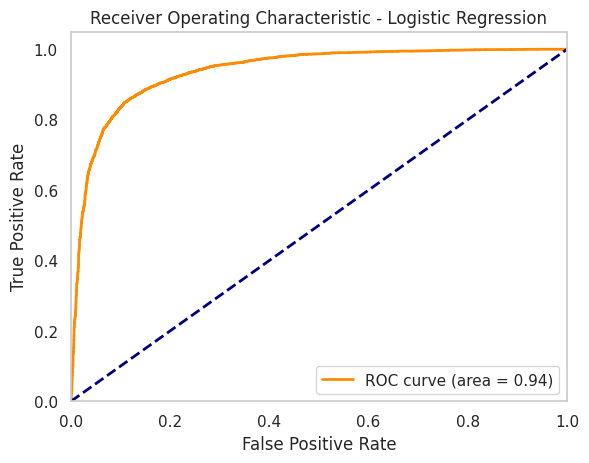



Accuracy: 0.8691666666666666






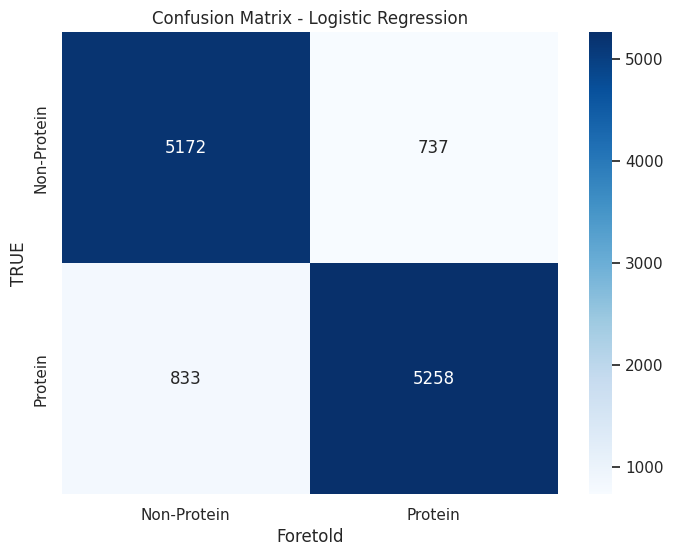



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5909
           1       0.88      0.86      0.87      6091

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000


Machine Learning Model: Naive bayes





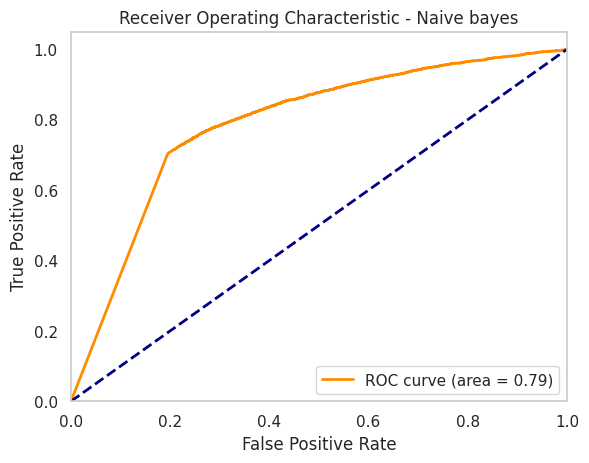



Accuracy: 0.7373333333333333






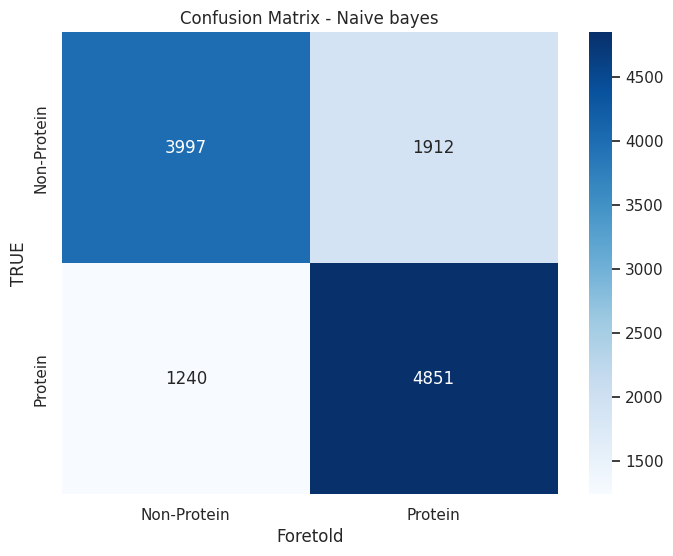



Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      5909
           1       0.72      0.80      0.75      6091

    accuracy                           0.74     12000
   macro avg       0.74      0.74      0.74     12000
weighted avg       0.74      0.74      0.74     12000


Machine Learning Model: KNN





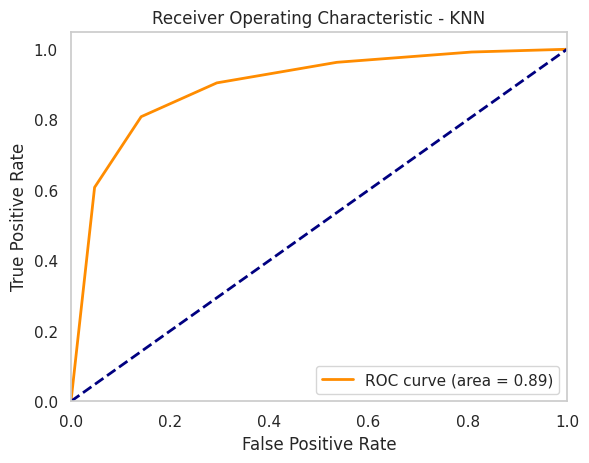



Accuracy: 0.80675






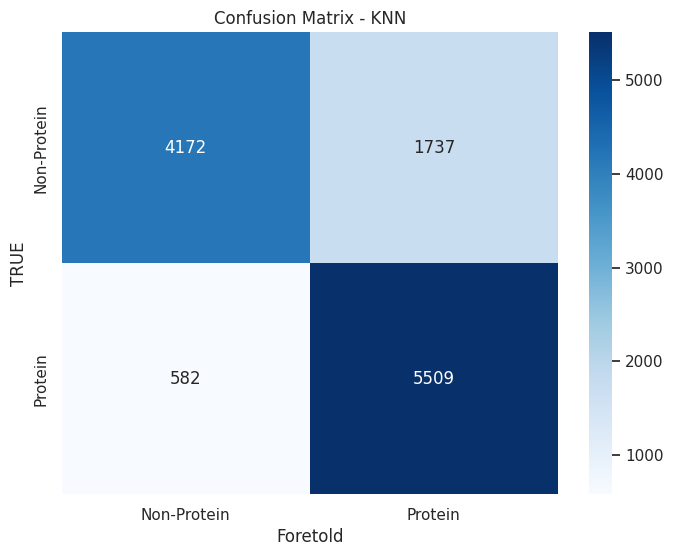



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      5909
           1       0.76      0.90      0.83      6091

    accuracy                           0.81     12000
   macro avg       0.82      0.81      0.80     12000
weighted avg       0.82      0.81      0.80     12000


Machine Learning Model: Ada Boost





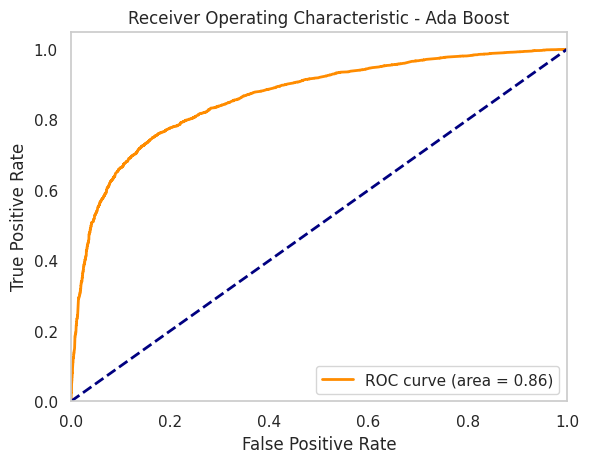



Accuracy: 0.7906666666666666






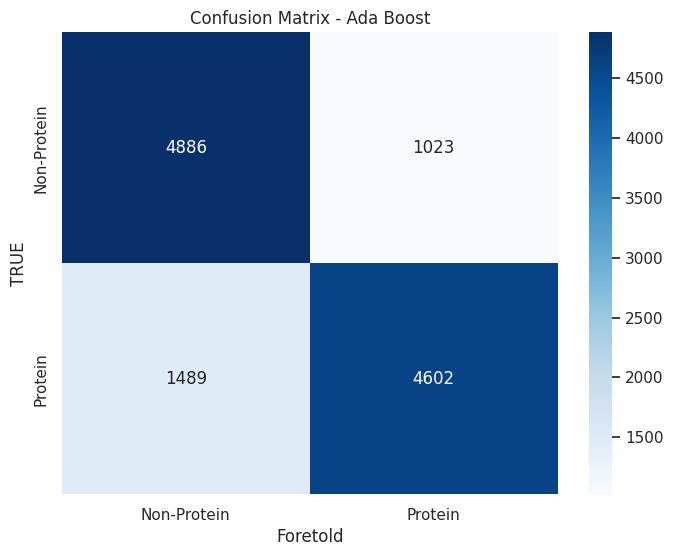



Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      5909
           1       0.82      0.76      0.79      6091

    accuracy                           0.79     12000
   macro avg       0.79      0.79      0.79     12000
weighted avg       0.79      0.79      0.79     12000


Machine Learning Model: Gradient Boosting Classifier





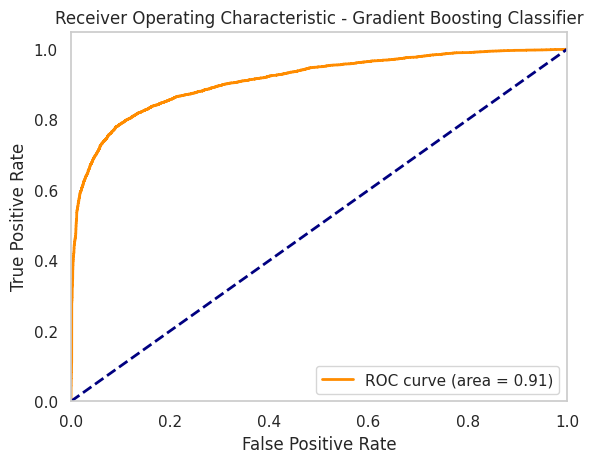



Accuracy: 0.8380833333333333






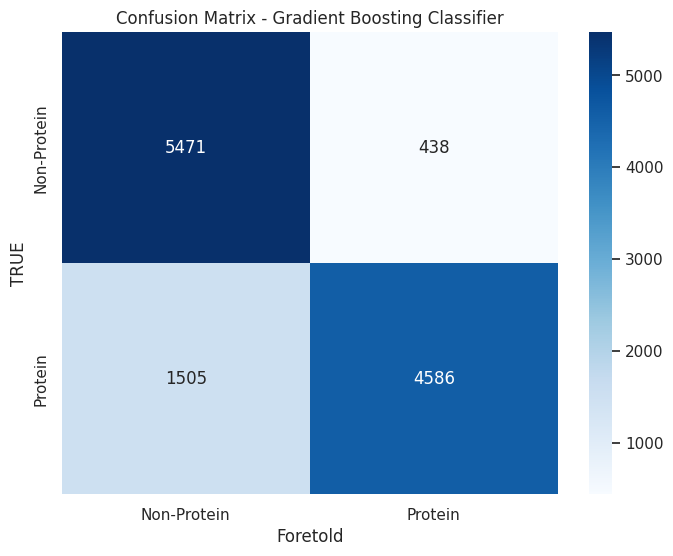



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      5909
           1       0.91      0.75      0.83      6091

    accuracy                           0.84     12000
   macro avg       0.85      0.84      0.84     12000
weighted avg       0.85      0.84      0.84     12000


Machine Learning Model: Decision Tree Classifier





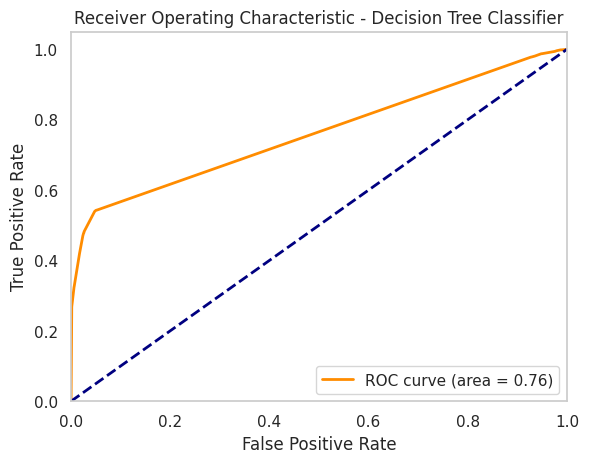



Accuracy: 0.7429166666666667






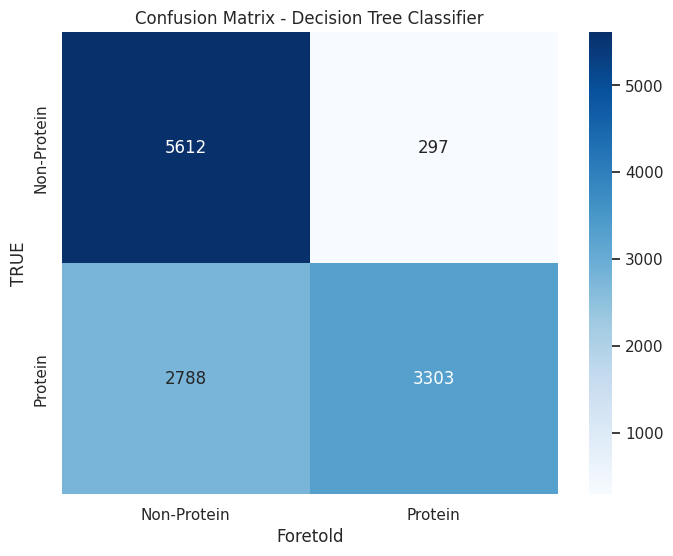



Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.95      0.78      5909
           1       0.92      0.54      0.68      6091

    accuracy                           0.74     12000
   macro avg       0.79      0.75      0.73     12000
weighted avg       0.79      0.74      0.73     12000


Machine Learning Model: XGBoost





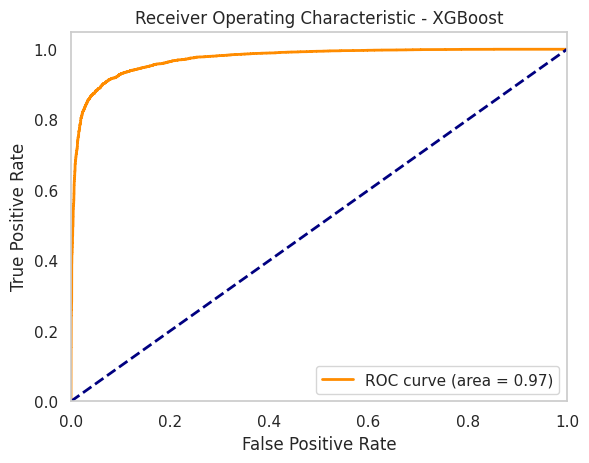



Accuracy: 0.9163333333333333






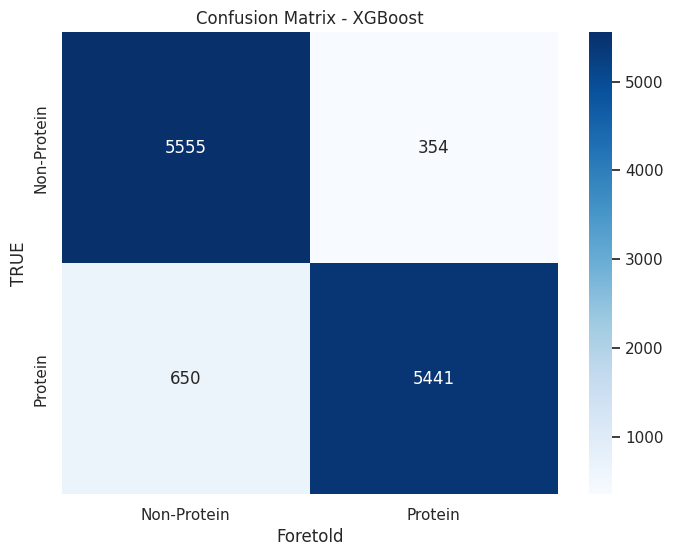



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5909
           1       0.94      0.89      0.92      6091

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explic

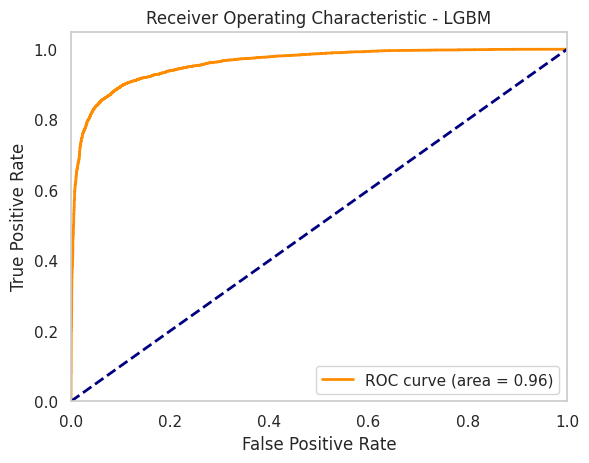



Accuracy: 0.8956666666666667






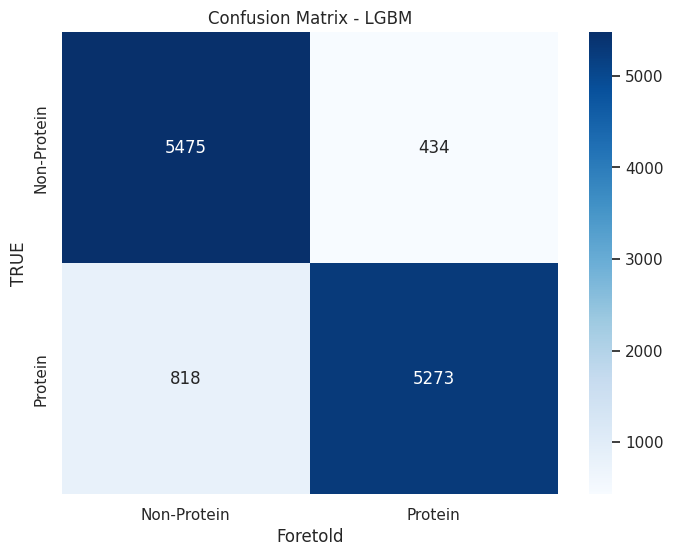



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5909
           1       0.92      0.87      0.89      6091

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



In [16]:
# Iterating over each model
for nome, modelo in models.items():

    # Model training
    modelo.fit(X_train, y_train)

    # Prediction on test set
    y_pred = modelo.predict(X_test)

    print()
    print("Machine Learning Model:", nome)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, modelo.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    print()
    print()

    # Plotting the ROC curve
    print()
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - {}'.format(nome))
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    print()
    print()
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print()
    print()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print()
    print()
    
    # Plotting the confusion matrix with Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - {}'.format(nome))
    plt.xlabel('Foretold')
    plt.ylabel('TRUE') 
    plt.xticks(ticks=[0.5, 1.5], labels=['Non-Protein', 'Protein'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Non-Protein', 'Protein'])
    plt.show()
    print()
    print()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [17]:
from sklearn.metrics import average_precision_score

# Dictionary to store accuracy and average precision metrics
resultados_metricas = {'Model': [], 
                       'Accuracy': [],
                       'Average Precision': []
                      }

# Iterating over each model
for nome, modelo in models.items():
    
    # Model training
    modelo.fit(X_train, y_train)

    # Prediction on test set
    y_pred = modelo.predict(X_test)

    # Calculating accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Calculating average precision
    avg_precision = average_precision_score(y_test, y_pred)

    # Storing accuracy and average precision results in the dictionary
    resultados_metricas['Model'].append(nome)
    resultados_metricas['Accuracy'].append(acc)
    resultados_metricas['Average Precision'].append(avg_precision)

# Creating DataFrame with the results
df_metricas = pd.DataFrame(resultados_metricas)

# Displaying the DataFrame sorted by accuracy column in descending order
df_metricas_sorted = df_metricas.sort_values(by='Accuracy', ascending=False)
df_metricas_sorted

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,Model,Accuracy,Average Precision
6,XGBoost,0.916333,0.892884
7,LGBM,0.895667,0.868036
0,Logistic Regression,0.869167,0.826534
4,Gradient Boosting Classifier,0.838083,0.812691
2,KNN,0.806750,0.736136
3,Ada Boost,0.790667,0.742217
5,Decision Tree Classifier,0.742917,0.729871
1,Naive bayes,0.737333,0.674594


In [18]:
%%time

# Importing libraries
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Define the hyperparameters
params = {'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric': 'binary_logloss',
          'device': 'gpu',  # Usar GPU
          'gpu_platform_id': 0,
          'gpu_device_id': 0,
         }

# Create the model
model_LGBMClassifier = LGBMClassifier(**params)

# Train the model
model_LGBMClassifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 23909, number of negative: 24091
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2016
[LightGBM] [Info] Number of data points in the train set: 48000, number of used features: 1008
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 10 dense feature groups (0.37 MB) transferred to GPU in 0.001471 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498104 -> initscore=-0.007583
[LightGBM] [Info] Start training from score -0.007583
CPU times: user 10.9 s, sys: 212 ms, total: 11.1 s
Wall time: 8.87 s


LGBMClassifier(device='gpu', gpu_device_id=0, gpu_platform_id=0,
               metric='binary_logloss', objective='binary')

In [19]:
%%time

# Use the model to make probability predictions
prob_predictions = model_LGBMClassifier.predict_proba(X_test)

# If the positive class is the second class, you would use prob_predictions[:, 1]
positive_probabilities = prob_predictions[:, 1]

# Create a pandas DataFrame with the predicted probabilities
df = pd.DataFrame(
    {'Id': range(1, len(X_test) + 1), 
     'binds': positive_probabilities})

# Model 1 - LGBM
# Save the DataFrame to a CSV file
df.to_csv('/kaggle/working/submission_NGCDFG.csv', index=False)

CPU times: user 1.76 s, sys: 3.06 ms, total: 1.76 s
Wall time: 1.66 s
